# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Read Dataset & Exploratory Data Analysis

## Reading Dataset

In [2]:
#Reading csv file
data = pd.read_csv("Historical Sales and Active Inventory.csv")

In [3]:
#Checking csv file
data.drop(columns=['Order'], inplace=True)
data.head()

,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
#Listing out data shape & number of unique entries per data column

print(data.shape)
print(data.nunique())

(198917, 13)
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64


In [5]:
#Listing datatype for each data column

data.dtypes

File_Type            object
SKU_number            int64
SoldFlag            float64
SoldCount           float64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor      float64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
dtype: object

In [6]:
# Checking null results within data

print(data.isnull().sum())

# Checking NA results within data
print("\n")
print(data.isna().sum())

File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64


File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64


## Exploratory Data Analysis

In [7]:
data.describe().round(2).T.style.background_gradient(
    vmin=1, vmax=1, cmap=sns.color_palette('RdYlGn', as_cmap=True)
)

,count,mean,std,min,25%,50%,75%,max
SKU_number,198917.000000,861362.630000,869979.380000,50001.000000,217252.000000,612208.000000,904751.000000,3960788.000000
SoldFlag,75996.000000,0.170000,0.380000,0.000000,0.000000,0.000000,0.000000,1.000000
SoldCount,75996.000000,0.320000,1.170000,0.000000,0.000000,0.000000,0.000000,73.000000
ReleaseNumber,198917.000000,3.410000,3.860000,0.000000,1.000000,2.000000,5.000000,99.000000
New_Release_Flag,198917.000000,0.640000,0.480000,0.000000,0.000000,1.000000,1.000000,1.000000
StrengthFactor,198917.000000,1117115.210000,1522090.390000,6.280000,161418.770000,582224.000000,1430083.000000,17384454.000000
PriceReg,198917.000000,90.900000,86.740000,0.000000,42.000000,69.950000,116.000000,12671.480000
ReleaseYear,198917.000000,2006.020000,9.160000,0.000000,2003.000000,2007.000000,2011.000000,2018.000000
ItemCount,198917.000000,41.430000,37.540000,0.000000,21.000000,32.000000,50.000000,2542.000000
LowUserPrice,198917.000000,30.980000,69.070000,0.000000,4.910000,16.080000,40.240000,14140.210000


## Split Filetype to Historical

In [8]:
# Checking 'File_Type' unique entries and grouping them

print(data['File_Type'].unique())

data_sub = data.groupby(['File_Type'])


# Separating datasets into "Historial" (meaning historical sales data) and "Active" (meaning current active inventory)
data_historical = data_sub.get_group('Historical')

data_active = data_sub.get_group('Active')

['Historical' 'Active']


In [9]:
# Checking shape of Historical dataset and Active dataset

print(data_active.shape)

print(data_historical.shape)

(122921, 13)
(75996, 13)


In [10]:
data_historical

,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75991,Historical,863599,0.0,0.0,S,2,1,119056.0,64.99,2008,34,32.49,53.00
75992,Historical,614304,0.0,0.0,S,6,1,1115312.0,21.50,2004,53,47.99,21.97
75993,Historical,109021,0.0,0.0,S,7,1,1315446.0,142.75,2006,19,47.99,53.99
75994,Historical,658242,0.0,0.0,S,2,1,877788.0,50.00,2012,21,27.07,32.62


## EDA for historical filetype data

### Barplot visualisation for categorical data

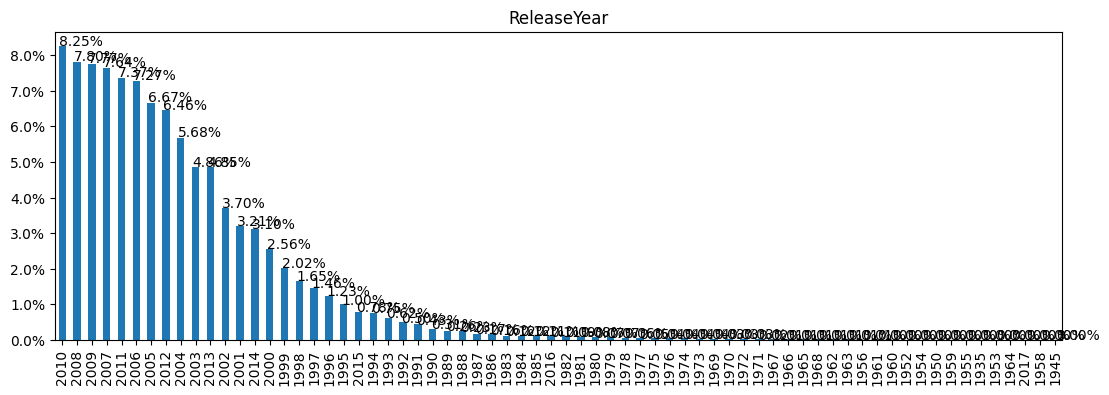

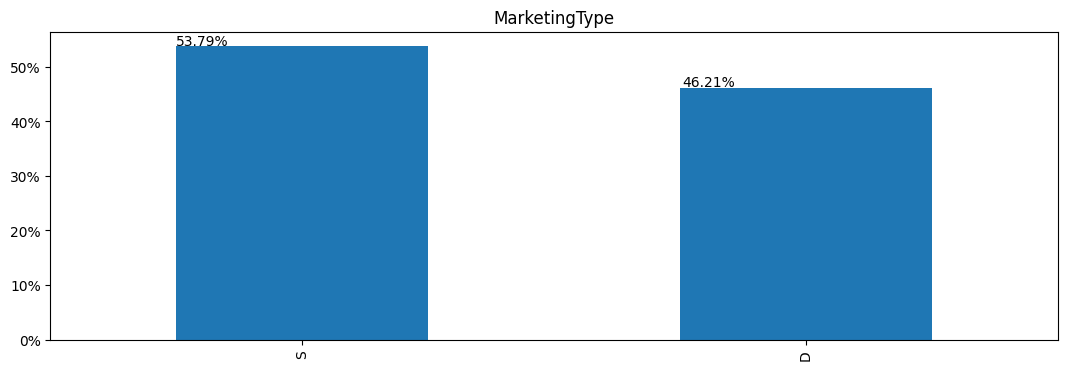

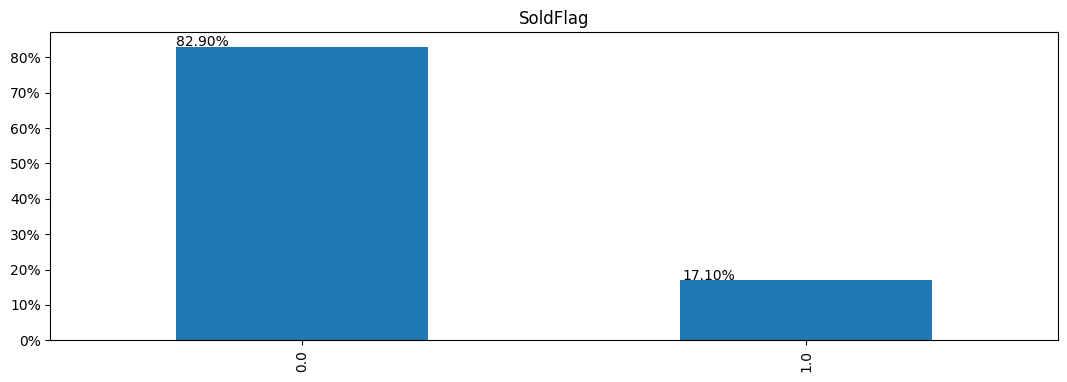

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# Categorical Columns from historical data that we want to plot and visualise

historical_cat_cols = ['ReleaseYear', 'MarketingType', 'SoldFlag']

## plot bar charts for historical data
for i in historical_cat_cols :
    ax = data_historical[i].value_counts(normalize=True).plot(kind='bar',figsize=(13,4))
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.title(i)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2%'), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

- Top 3 years whereby products were released the most were in 2010 (8.25%), 2008 (7.80%), 2009 (7.77%)
- More products were marketed using the S-Marketing type (53.79%) compared to Direct marketing (46.21%)
- 17.1% of the products in historical data were sold within 6 months, the other 82.9% were either unsold or sold after a period of 6 months
(Oversampling method would be required before training Classification model, if label is SoldFlag)

### Histogram and Boxplot visualisation for numerical data

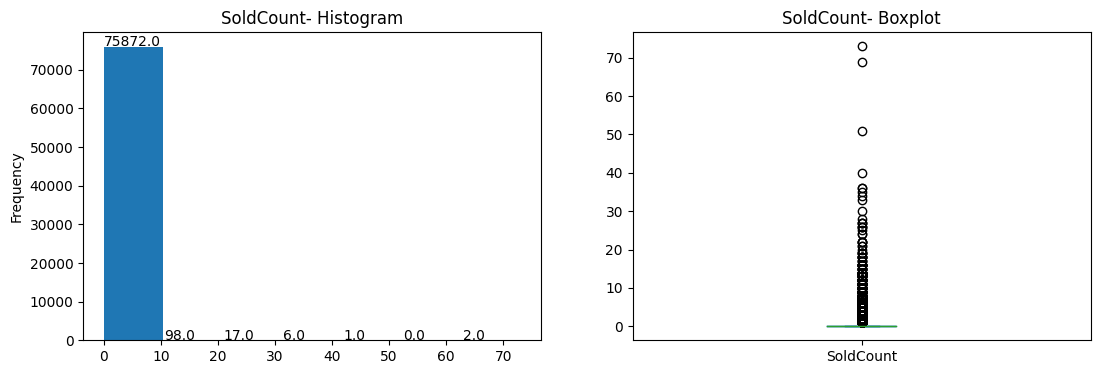

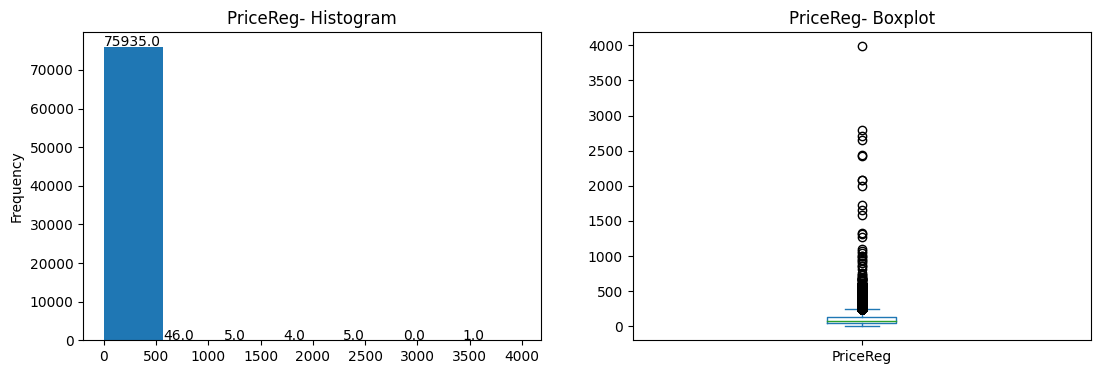

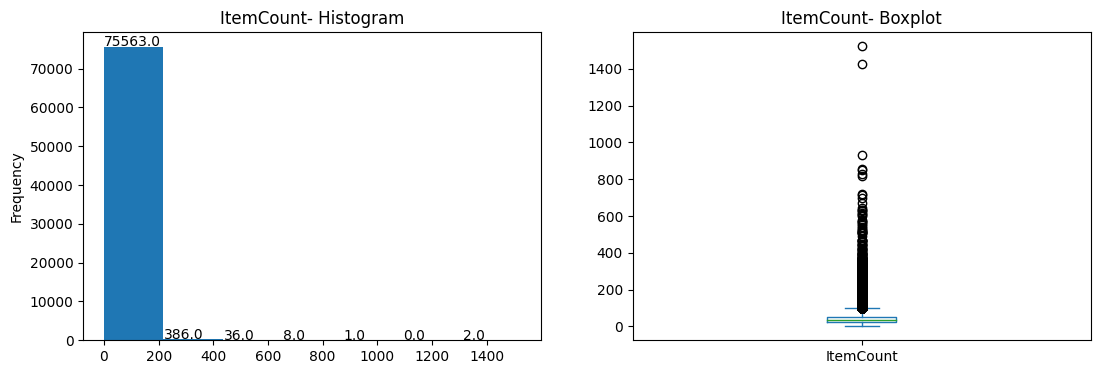

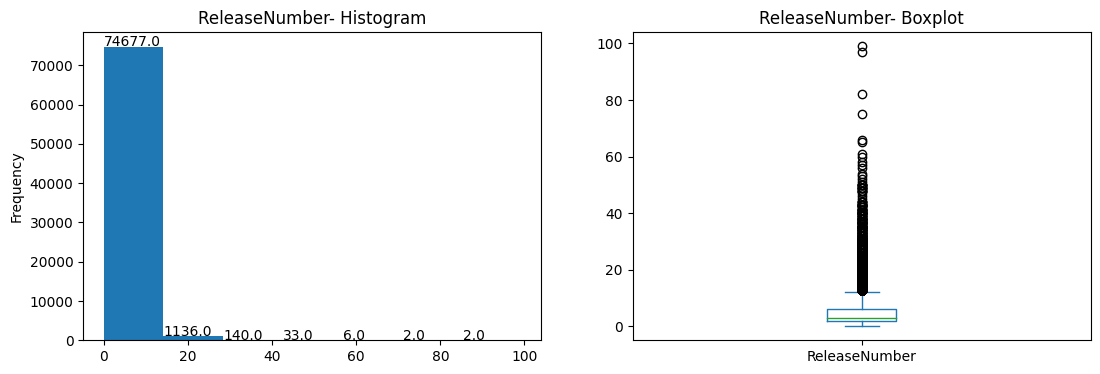

In [12]:
# Numerical Columns from historical data that we want to plot and visualise

historical_float_cols = ['SoldCount', 'PriceReg', 'ItemCount', 'ReleaseNumber']

## plot histogram and box plots for historical data
for i in historical_float_cols :
    _, ax = plt.subplots(1, 2, figsize = (13, 4))
    data_historical[i].plot.hist(ax = ax[0], bins=7)
    ax[0].set_title(i + '- Histogram')
    for p in ax[0].patches:
        ax[0].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    data_historical[i].plot(kind='box', ax = ax[1])
    ax[1].set_title(i + '- Boxplot')
    plt.show()

Based on the histogram and boxplot of the SoldCount, PriceReg and ItemCount from historical data:
- Most of the products sold count is below 10 pieces
- Most of the products cost below USD600.00
- The company usually keeps about 200 pieces for each product in their warehouse regardless of the sold count
- Most of the products released had less than 15 versions

### Correlation plot and Heatmap for features

In [13]:
corr_data = pd.get_dummies(data_historical[['ItemCount', 'SoldCount', 'PriceReg', 'ReleaseNumber', 'ReleaseYear', 'MarketingType']], drop_first=True)

corr_data

,ItemCount,SoldCount,PriceReg,ReleaseNumber,ReleaseYear,MarketingType_S
0,8,0.0,44.99,15,2015,0
1,39,0.0,24.81,7,2005,0
2,34,0.0,46.00,0,2013,0
3,20,1.0,100.00,4,2006,0
4,28,1.0,121.95,2,2010,0
...,...,...,...,...,...,...
75991,34,0.0,64.99,2,2008,1
75992,53,0.0,21.50,6,2004,1
75993,19,0.0,142.75,7,2006,1
75994,21,0.0,50.00,2,2012,1


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Computing correlation


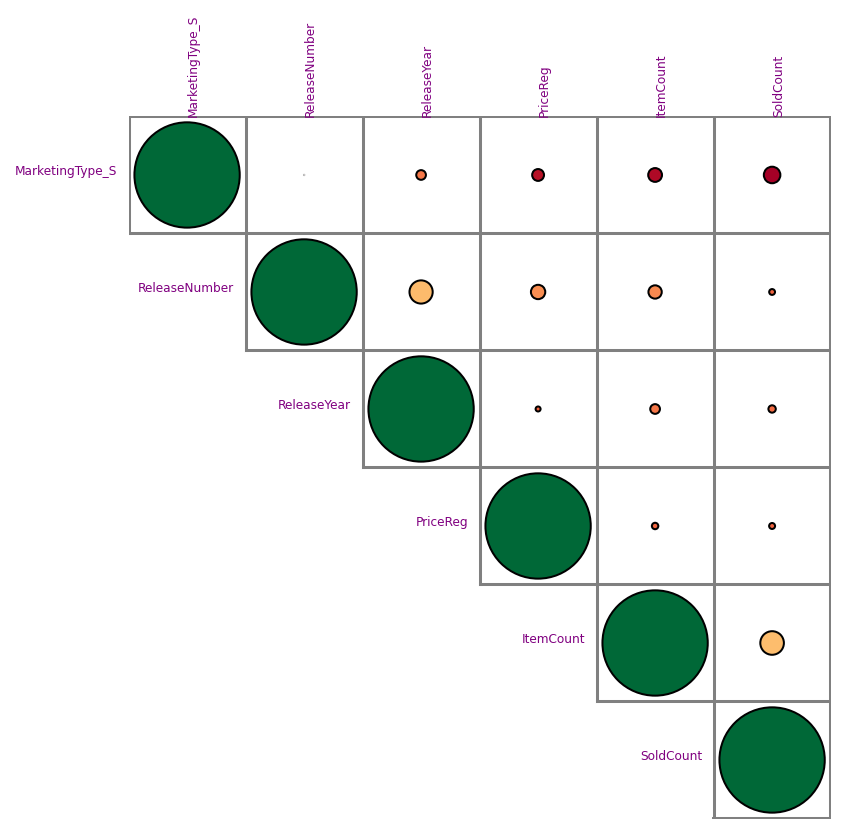

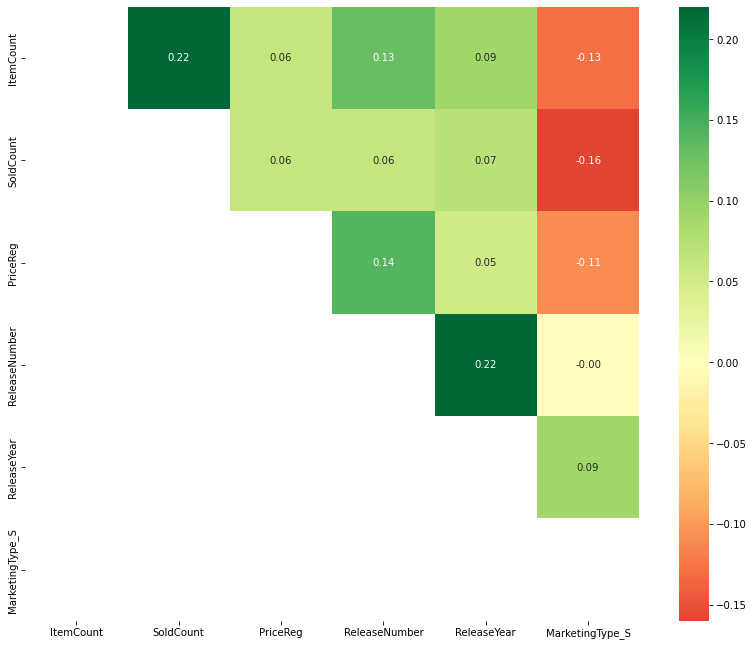

In [14]:
# Correlational plot for ItemCount, SoldCount, PriceReg and ReleaseNumber

%pylab inline
matplotlib.rcParams['figure.dpi'] = 145
matplotlib.rcParams['figure.figsize'] = (8,6)
from biokit.viz import corrplot
correlation = corrplot.Corrplot(corr_data)
correlation.plot(colorbar=False, method='square', shrink=.9 ,rotation=90, upper='circle',grid='grey',
       fontsize=6,label_color='purple',
       cmap='RdYlGn')
plt.show();


matplotlib.rcParams['figure.dpi'] = 72.5

# Calculate pairwise-correlation
matrix = corr_data.corr().round(2)

# Create a mask
mask = np.tril(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(14, 11))
sns.heatmap(matrix, mask = mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='RdYlGn')

plt.show();

Positive Correlational insights:
- Item count and Sold Count have the highest positive correlation -> If your product sells well, naturally you want to restock more.
- Release Year and Release Number have the highest positive correlation -> This can be explained as more releases means the released year would be very recent
- Item count and Release Number also have positive correlation -> If your product sells well, you would also want to provide more versions of it to cater to that target audience
- Price Reg and Release Number also have positive correlation -> If each version of the product is an improvement, naturally the cost from R&D will be added into its price


Negative Correlational insights:
- S-Marketing and Sold Count have the highest negative correlation -> This could mean direct marketing is a better strategy, but the underlying reason is still unknown due to insufficient contextual information e.g. client type, how the sales were made, what kind of product is it, etc.
- S-Marketing and Item Count have negative correlation -> This may require more contextual information, however if the item was directly marketed, more products quantities need to be stored in the inventory

### Some preprocessing checks on historical and active datasets

In [15]:
# Double checking that Active dataset has no sales

data_active.isnull().sum()

File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [16]:
# This 57364 are the excess SKU products in active inventory that are not found in historical sales from the historical data

len(set(data_active.SKU_number) - set(data_historical.SKU_number))

57364

In [17]:
# Products that have sold and are no longer found in the active inventory (could be sold out or no longer commissioned to stock up)

len(set(data_historical.SKU_number) - set(data_active.SKU_number))

10439

In [18]:
data_active.nunique()

File_Type                1
SKU_number          122921
SoldFlag                 0
SoldCount                0
MarketingType            2
ReleaseNumber           70
New_Release_Flag         2
StrengthFactor      122890
PriceReg             10922
ReleaseYear             85
ItemCount              470
LowUserPrice          6827
LowNetPrice          14676
dtype: int64

In [19]:
data_historical.nunique()

File_Type               1
SKU_number          75996
SoldFlag                2
SoldCount              37
MarketingType           2
ReleaseNumber          66
New_Release_Flag        2
StrengthFactor      74603
PriceReg             9010
ReleaseYear            68
ItemCount             406
LowUserPrice        11186
LowNetPrice         12495
dtype: int64

### Merging historical and active dataset on unique identifiable number (i.e. SKU Number)

In [20]:
# Merging historical and active dataset based on common SKU numbers

merge_1 = pd.merge(data_historical, data_active, on = "SKU_number", suffixes=('_hist', '_active'))

merge_1

,File_Type_hist,SKU_number,SoldFlag_hist,SoldCount_hist,MarketingType_hist,ReleaseNumber_hist,New_Release_Flag_hist,StrengthFactor_hist,PriceReg_hist,ReleaseYear_hist,...,SoldCount_active,MarketingType_active,ReleaseNumber_active,New_Release_Flag_active,StrengthFactor_active,PriceReg_active,ReleaseYear_active,ItemCount_active,LowUserPrice_active,LowNetPrice_active
0,Historical,3951300,0.0,0.0,D,10,1,2702745.0,0.00,2015,...,NaN,S,10,1,1.304119e+06,0.00,2015,6,17.27,16.53
1,Historical,809103,1.0,1.0,D,2,1,551090.0,599.00,2012,...,NaN,S,2,1,7.650125e+05,599.00,2012,13,9.07,26.09
2,Historical,876803,1.0,3.0,D,4,1,109229.0,0.00,2012,...,NaN,S,4,1,3.032048e+05,32.98,2012,41,7.49,21.01
3,Historical,699392,1.0,1.0,D,4,1,143390.0,104.75,2012,...,NaN,S,4,1,5.094544e+05,104.75,2012,14,66.96,0.00
4,Historical,618374,1.0,3.0,D,13,1,160427.0,292.00,2013,...,NaN,S,13,1,9.317454e+04,292.00,2013,100,23.19,83.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65552,Historical,863599,0.0,0.0,S,2,1,119056.0,64.99,2008,...,NaN,S,2,1,1.466957e+05,64.99,2008,34,41.83,53.00
65553,Historical,614304,0.0,0.0,S,6,1,1115312.0,21.50,2004,...,NaN,S,6,1,6.078198e+05,21.50,2004,53,4.91,21.97
65554,Historical,109021,0.0,0.0,S,7,1,1315446.0,142.75,2006,...,NaN,S,7,1,9.708068e+05,142.75,2006,21,19.24,53.99
65555,Historical,658242,0.0,0.0,S,2,1,877788.0,50.00,2012,...,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62


In [21]:
#Checking if the index numbers are unique or there might be duplicates

merge_1.nunique()

#All are unique SKU numbered products, so all's good to proceed.

File_Type_hist                 1
SKU_number                 65557
SoldFlag_hist                  2
SoldCount_hist                37
MarketingType_hist             2
ReleaseNumber_hist            64
New_Release_Flag_hist          2
StrengthFactor_hist        64416
PriceReg_hist               8069
ReleaseYear_hist              68
ItemCount_hist               396
LowUserPrice_hist          10934
LowNetPrice_hist           11366
File_Type_active               1
SoldFlag_active                0
SoldCount_active               0
MarketingType_active           2
ReleaseNumber_active          64
New_Release_Flag_active        2
StrengthFactor_active      65556
PriceReg_active             8452
ReleaseYear_active            70
ItemCount_active             409
LowUserPrice_active         5223
LowNetPrice_active         11367
dtype: int64

# Preparing historical data from merged dataset for train-test split (Regression ML model)

In [22]:
# Splitting back the data into Historical data based on common SKU numbers for training and testing
# Dropping unnecessary features

data_historical_SKU = merge_1.iloc[:,1:10]

data_historical_SKU = data_historical_SKU.drop(columns=['SKU_number', 'SoldFlag_hist','New_Release_Flag_hist', 'StrengthFactor_hist'])

data_historical_SKU

,SoldCount_hist,MarketingType_hist,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist
0,0.0,D,10,0.00,2015
1,1.0,D,2,599.00,2012
2,3.0,D,4,0.00,2012
3,1.0,D,4,104.75,2012
4,3.0,D,13,292.00,2013
...,...,...,...,...,...
65552,0.0,S,2,64.99,2008
65553,0.0,S,6,21.50,2004
65554,0.0,S,7,142.75,2006
65555,0.0,S,2,50.00,2012


In [23]:
data_historical_SKU['SoldCount_hist'].value_counts().sort_values(ascending = False)

# This means that 53 073 products were not sold, while 12 484 products were sold at different quantities
# This shows imbalance and the labels are positive skewed

0.0     53073
1.0      7758
2.0      2469
3.0      1008
4.0       479
5.0       253
6.0       148
7.0       121
8.0        62
9.0        32
10.0       30
12.0       28
11.0       21
14.0       11
13.0       10
16.0        9
15.0        6
18.0        5
19.0        4
22.0        4
17.0        3
26.0        3
27.0        3
36.0        2
24.0        2
21.0        2
28.0        1
40.0        1
25.0        1
33.0        1
51.0        1
69.0        1
35.0        1
20.0        1
34.0        1
73.0        1
30.0        1
Name: SoldCount_hist, dtype: int64

## Get Dummy variables and Scale Feature dataset

In [24]:
data_historical_SKU = pd.get_dummies(data_historical_SKU, drop_first=True)

data_historical_SKU

# Marketing type = 0, means it is direct marketing
# Marketing type = 1, means it is a integrated marketing type with sales and marketing departments

,SoldCount_hist,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S
0,0.0,10,0.00,2015,0
1,1.0,2,599.00,2012,0
2,3.0,4,0.00,2012,0
3,1.0,4,104.75,2012,0
4,3.0,13,292.00,2013,0
...,...,...,...,...,...
65552,0.0,2,64.99,2008,1
65553,0.0,6,21.50,2004,1
65554,0.0,7,142.75,2006,1
65555,0.0,2,50.00,2012,1


In [25]:
SoldCount_hist = data_historical_SKU['SoldCount_hist']

data_historical_SKU.drop(columns='SoldCount_hist', axis = 1, inplace=True)

data_historical_SKU

,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S
0,10,0.00,2015,0
1,2,599.00,2012,0
2,4,0.00,2012,0
3,4,104.75,2012,0
4,13,292.00,2013,0
...,...,...,...,...
65552,2,64.99,2008,1
65553,6,21.50,2004,1
65554,7,142.75,2006,1
65555,2,50.00,2012,1


In [26]:
#Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_historical_SKU)

col_name = data_historical_SKU.columns

data_historical_SKU = scaler.transform(data_historical_SKU)
data_historical_SKU = pd.DataFrame(data_historical_SKU, columns=col_name)
data_historical_SKU = data_historical_SKU.join(SoldCount_hist)

data_historical_SKU

,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S,SoldCount_hist
0,1.522531,-1.279978,1.509194,-1.041608,0.0
1,-0.536564,6.526896,0.999633,-1.041608,1.0
2,-0.021790,-1.279978,0.999633,-1.041608,3.0
3,-0.021790,0.085248,0.999633,-1.041608,1.0
4,2.294691,2.525710,1.169487,-1.041608,3.0
...,...,...,...,...,...
65552,-0.536564,-0.432951,0.320218,0.960054,0.0
65553,0.492983,-0.999764,-0.359196,0.960054,0.0
65554,0.750370,0.580509,-0.019489,0.960054,0.0
65555,-0.536564,-0.628319,0.999633,0.960054,0.0


## Splitting into Feature dataset and Label dataset from data_historical

In [27]:
features_hist = data_historical_SKU.drop(['SoldCount_hist'], axis = 1)

features_hist

,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S
0,1.522531,-1.279978,1.509194,-1.041608
1,-0.536564,6.526896,0.999633,-1.041608
2,-0.021790,-1.279978,0.999633,-1.041608
3,-0.021790,0.085248,0.999633,-1.041608
4,2.294691,2.525710,1.169487,-1.041608
...,...,...,...,...
65552,-0.536564,-0.432951,0.320218,0.960054
65553,0.492983,-0.999764,-0.359196,0.960054
65554,0.750370,0.580509,-0.019489,0.960054
65555,-0.536564,-0.628319,0.999633,0.960054


In [28]:
target_hist = data_historical_SKU.SoldCount_hist

target_hist

0        0.0
1        1.0
2        3.0
3        1.0
4        3.0
        ... 
65552    0.0
65553    0.0
65554    0.0
65555    0.0
65556    0.0
Name: SoldCount_hist, Length: 65557, dtype: float64

## Train-Test split the scaled and dummied features of data_historical

In [29]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features_hist, target_hist, test_size=0.25, random_state=326)

In [30]:
# Double checking the train test split

print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(49167, 4)
(16390, 4)
(49167,)
(16390,)


# Use PyCaret to find Best regression model

### https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [31]:
data_historical_SKU.dtypes

ReleaseNumber_hist      float64
PriceReg_hist           float64
ReleaseYear_hist        float64
MarketingType_hist_S    float64
SoldCount_hist          float64
dtype: object

In [32]:
import pycaret
from pycaret.regression import *

regression = setup(data = data_historical_SKU, target = 'SoldCount_hist', session_id=7801)

,Description,Value
0,session_id,7801
1,Target,SoldCount_hist
2,Original Data,"(65557, 5)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(45889, 4)"


In [33]:
best = compare_models()

# For Mean Absolute error, we want it to be as low as possible
# For Mean Squared error, we want it to be as low as possible
# For Root Mean Squared error, we want it to be as low as possible
# For R squared, we want it to be as close to 1 as possible
# From the results, Gradient Boosting Regressor is the best option

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5425,1.6674,1.2802,0.0345,0.4214,0.6365,0.2260
lar,Least Angle Regression,0.5584,1.6685,1.2813,0.0326,0.4265,0.6323,0.0050
br,Bayesian Ridge,0.5585,1.6685,1.2813,0.0326,0.4264,0.6325,0.0060
lr,Linear Regression,0.5584,1.6685,1.2813,0.0326,0.4265,0.6323,0.4850
ridge,Ridge Regression,0.5584,1.6685,1.2813,0.0326,0.4265,0.6323,0.0050
lightgbm,Light Gradient Boosting Machine,0.5433,1.6672,1.2810,0.0324,0.4265,0.6550,0.0330
omp,Orthogonal Matching Pursuit,0.5641,1.6830,1.2869,0.0239,0.4284,0.6500,0.0050
llar,Lasso Least Angle Regression,0.6005,1.7235,1.3026,-0.0004,0.4383,0.7151,0.0050
lasso,Lasso Regression,0.6005,1.7235,1.3026,-0.0004,0.4383,0.7151,0.2000
en,Elastic Net,0.6005,1.7235,1.3026,-0.0004,0.4383,0.7151,0.0050


In [34]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Based on the low and poor R-squared score, and the high Root Mean Squared Error, I am changing from regression training to classification training

Nonetheless I will try to improve the GBR model first by looking at feature importance

## Look at Gradient Boosting Regressor's parameters

In [35]:
# predict_model(best, data = data_historical_SKU)

# best.get_params()

# Learning rate = 0.1
# max_depth = 3
# n_estimators = 100
# random state = 7801

# Tuning hyperparameters of GB Regressor using GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

param_grid = {
    'alpha': [0.9],
    'ccp_alpha': [0.0],
    'criterion': ['friedman_mse'],
    'learning_rate': [0.05, 0.055],
    'loss': ['ls'],
    'max_depth': [3],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [90],
    'presort': ['deprecated'],
    'random_state': [7801],
    'subsample': [1.0],
    'tol': [0.0001],
    'validation_fraction': [0.1],
    'verbose': [0],
    'warm_start': ['False']
}

In [37]:
optimal_params = GridSearchCV(
                    estimator = GBR,  
                    param_grid = param_grid,
                    scoring = 'r2',
                    verbose = 0, 
                    cv = 3
)

optimal_params.fit(features_train, 
                   target_train, 
)

print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 90, 'presort': 'deprecated', 'random_state': 7801, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': 'False'}
0.05058115208307368


## Best parameters for Gradient boosting after doing gridsearchCV is:
Learning rate = 0.05

loss = la

max_depth = 3

n_estimators = 90

random_state = 7801

R2 score of 0.0506

### Using these parameters to predict features test

In [38]:
test_predict = optimal_params.predict(features_test)

In [39]:
features_test

,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S
3751,-0.793951,-0.576838,-1.718026,-1.041608
48714,0.235597,-0.707169,0.999633,0.960054
62688,-1.051337,-0.107643,0.490072,0.960054
52853,-0.536564,-0.107643,-1.378318,0.960054
60827,-0.793951,-0.148698,0.320218,0.960054
...,...,...,...,...
50714,-0.279177,0.042890,-0.698904,0.960054
47343,0.492983,1.000177,1.339340,0.960054
26810,-0.279177,-0.172157,0.490072,-1.041608
39028,-0.279177,2.611729,0.999633,0.960054


In [40]:
from sklearn import metrics

print("The MAE for the test set is: ", metrics.mean_absolute_error(target_test, test_predict))
print("The MSE for the test set is: ", metrics.mean_squared_error(target_test, test_predict))
print("The r-Squared score for the test set is: ", metrics.r2_score(target_test, test_predict))

The MAE for the test set is:  0.5398294278260489
The MSE for the test set is:  1.867706734273067
The r-Squared score for the test set is:  0.04798242446852119


# Testing feature removal to improve GB Regressor (least important feature: 'ReleaseNumber_hist')

### Using same session_id (or random state) = 7801

In [41]:
# data_historical_SKU_v2 = data_historical_SKU.drop(columns=['ReleaseNumber_hist'])

# regression_v2 = setup(data = data_historical_SKU_v2, target = 'SoldCount_hist', session_id= 7801)

In [42]:
# best_v2 = compare_models(exclude = ['ransac'])

# Now linear regression appears to be better after removing the ReleaseNumber_hist

New model without least import feature deproved (R-squared of 0.0345 to 0.0272) and the best regressor model changed to linear regression.

We will just use the tuned GBR to predict active inventory data

# Using Tuned GB Regressor to predict data_active

## Preprocessing data_active for prediction

In [43]:
merge_1.nunique()

File_Type_hist                 1
SKU_number                 65557
SoldFlag_hist                  2
SoldCount_hist                37
MarketingType_hist             2
ReleaseNumber_hist            64
New_Release_Flag_hist          2
StrengthFactor_hist        64416
PriceReg_hist               8069
ReleaseYear_hist              68
ItemCount_hist               396
LowUserPrice_hist          10934
LowNetPrice_hist           11366
File_Type_active               1
SoldFlag_active                0
SoldCount_active               0
MarketingType_active           2
ReleaseNumber_active          64
New_Release_Flag_active        2
StrengthFactor_active      65556
PriceReg_active             8452
ReleaseYear_active            70
ItemCount_active             409
LowUserPrice_active         5223
LowNetPrice_active         11367
dtype: int64

In [44]:
# Splitting back the data into Active Inventory data based on common SKU numbers for company's answer
# Dropping unnecessary features and remaining the data headers to be identifiable to the trained model

active_col = [1] + list(range(16, 23))

data_active_SKU = merge_1.iloc[:, active_col]

data_active_SKU = data_active_SKU.drop(columns=['New_Release_Flag_active', 'StrengthFactor_active'])

data_active_SKU.rename(columns={'MarketingType_active':'MarketingType_hist', 
                                'ReleaseNumber_active':'ReleaseNumber_hist',
                                'PriceReg_active':'PriceReg_hist',
                                'ReleaseYear_active':'ReleaseYear_hist'}, inplace = True)

In [45]:
data_active_SKU

,SKU_number,MarketingType_hist,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,ItemCount_active
0,3951300,S,10,0.00,2015,6
1,809103,S,2,599.00,2012,13
2,876803,S,4,32.98,2012,41
3,699392,S,4,104.75,2012,14
4,618374,S,13,292.00,2013,100
...,...,...,...,...,...,...
65552,863599,S,2,64.99,2008,34
65553,614304,S,6,21.50,2004,53
65554,109021,S,7,142.75,2006,21
65555,658242,S,2,50.00,2012,23


### Get dummy variables for data_active

In [46]:
data_active_dummy = pd.get_dummies(data_active_SKU, drop_first=True)

data_active_dummy

# Marketing type = 0, means it is S-marketing
# Marketing type = 1, means it is Direct marketing

,SKU_number,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,ItemCount_active,MarketingType_hist_S
0,3951300,10,0.00,2015,6,1
1,809103,2,599.00,2012,13,1
2,876803,4,32.98,2012,41,1
3,699392,4,104.75,2012,14,1
4,618374,13,292.00,2013,100,1
...,...,...,...,...,...,...
65552,863599,2,64.99,2008,34,1
65553,614304,6,21.50,2004,53,1
65554,109021,7,142.75,2006,21,1
65555,658242,2,50.00,2012,23,1


### Scaling features for data_active

In [47]:
from sklearn.compose import ColumnTransformer

# scaler.fit(data_active_dummy)

column_name = ['ReleaseNumber_hist', 'PriceReg_hist', 'ReleaseYear_hist', 'MarketingType_hist_S']

features_active = data_active_dummy[column_name]

CT = ColumnTransformer([
        ('Active_inventory',
        StandardScaler(),
        ['ReleaseNumber_hist', 'PriceReg_hist', 'ReleaseYear_hist', 'MarketingType_hist_S'])],
        remainder='passthrough'
)

data_active_dummy = pd.DataFrame(CT.fit_transform(features_active), columns = column_name)

data_active_dummy

,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S
0,1.531114,-1.290050,0.869718,1.258545
1,-0.533509,6.465635,0.580587,1.258545
2,-0.017353,-0.863034,0.580587,1.258545
3,-0.017353,0.066224,0.580587,1.258545
4,2.305348,2.490684,0.676964,1.258545
...,...,...,...,...
65552,-0.533509,-0.448578,0.195080,1.258545
65553,0.498803,-1.011674,-0.190428,1.258545
65554,0.756881,0.558237,0.002326,1.258545
65555,-0.533509,-0.642664,0.580587,1.258545


## Applying tuned GB Regressor to get Predicted_SoldCount

In [48]:
predictions = optimal_params.predict(data_active_dummy)
Label = pd.DataFrame(predictions, columns = ['Label'])

In [49]:
data_active_predict = data_active_dummy.copy()
data_active_predict['Predicted_SoldCount'] = Label.apply(np.ceil)

In [50]:
data_active_predict['SKU_Number'] = merge_1['SKU_number']

data_active_predict['ItemCount_active'] = merge_1['ItemCount_active']

first_col = data_active_predict.pop('SKU_Number')
last_col = data_active_predict.pop('ItemCount_active')

data_active_predict.insert(0, 'SKU_Number', first_col)
data_active_predict.insert(len(data_active_predict.columns), 'ItemCount_active', last_col)

data_active_predict

,SKU_Number,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S,Predicted_SoldCount,ItemCount_active
0,3951300,1.531114,-1.290050,0.869718,1.258545,1.0,6
1,809103,-0.533509,6.465635,0.580587,1.258545,1.0,13
2,876803,-0.017353,-0.863034,0.580587,1.258545,1.0,41
3,699392,-0.017353,0.066224,0.580587,1.258545,1.0,14
4,618374,2.305348,2.490684,0.676964,1.258545,1.0,100
...,...,...,...,...,...,...,...
65552,863599,-0.533509,-0.448578,0.195080,1.258545,1.0,34
65553,614304,0.498803,-1.011674,-0.190428,1.258545,1.0,53
65554,109021,0.756881,0.558237,0.002326,1.258545,1.0,21
65555,658242,-0.533509,-0.642664,0.580587,1.258545,1.0,23


## Products' SKU_Number that needs restocking based on the GBRegressor model

In [51]:
data_active_final = pd.concat([data_active_SKU, data_active_predict.iloc[:, [5, 6]]], axis =1)

data_active_final

,SKU_number,MarketingType_hist,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,ItemCount_active,Predicted_SoldCount,ItemCount_active
0,3951300,S,10,0.00,2015,6,1.0,6
1,809103,S,2,599.00,2012,13,1.0,13
2,876803,S,4,32.98,2012,41,1.0,41
3,699392,S,4,104.75,2012,14,1.0,14
4,618374,S,13,292.00,2013,100,1.0,100
...,...,...,...,...,...,...,...,...
65552,863599,S,2,64.99,2008,34,1.0,34
65553,614304,S,6,21.50,2004,53,1.0,53
65554,109021,S,7,142.75,2006,21,1.0,21
65555,658242,S,2,50.00,2012,23,1.0,23


In [52]:
data_active_final = data_active_final.iloc[:,:-1]

data_active_final

,SKU_number,MarketingType_hist,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,ItemCount_active,Predicted_SoldCount
0,3951300,S,10,0.00,2015,6,1.0
1,809103,S,2,599.00,2012,13,1.0
2,876803,S,4,32.98,2012,41,1.0
3,699392,S,4,104.75,2012,14,1.0
4,618374,S,13,292.00,2013,100,1.0
...,...,...,...,...,...,...,...
65552,863599,S,2,64.99,2008,34,1.0
65553,614304,S,6,21.50,2004,53,1.0
65554,109021,S,7,142.75,2006,21,1.0
65555,658242,S,2,50.00,2012,23,1.0


In [53]:
data_active_final.rename(columns = {'MarketingType_hist' : 'MarketingType', 
                                    'ReleaseNumber_hist' : 'ReleaseNumber', 
                                    'PriceReg_hist' : 'PriceReg', 
                                    'ReleaseYear_hist' : 'ReleaseYear'},
                                     inplace=True)

data_active_final

,SKU_number,MarketingType,ReleaseNumber,PriceReg,ReleaseYear,ItemCount_active,Predicted_SoldCount
0,3951300,S,10,0.00,2015,6,1.0
1,809103,S,2,599.00,2012,13,1.0
2,876803,S,4,32.98,2012,41,1.0
3,699392,S,4,104.75,2012,14,1.0
4,618374,S,13,292.00,2013,100,1.0
...,...,...,...,...,...,...,...
65552,863599,S,2,64.99,2008,34,1.0
65553,614304,S,6,21.50,2004,53,1.0
65554,109021,S,7,142.75,2006,21,1.0
65555,658242,S,2,50.00,2012,23,1.0


In [54]:
conditions = data_active_final[data_active_final['Predicted_SoldCount'] >= data_active_final['ItemCount_active']]

conditions.sort_values(by = 'PriceReg' ,ascending = False).head(10)

,SKU_number,MarketingType,ReleaseNumber,PriceReg,ReleaseYear,ItemCount_active,Predicted_SoldCount
62037,3504396,S,8,317.00,2016,0,1.0
57196,3504561,S,5,274.99,2016,0,1.0
62022,3504528,S,7,274.99,2016,0,1.0
58159,3467973,S,2,250.00,2016,0,1.0
46327,2351093,S,5,160.00,2016,0,1.0
46051,3483275,S,2,149.95,2016,0,1.0
31645,1438250,S,8,116.75,2008,0,1.0
64494,858486,S,4,115.00,2015,0,1.0
48196,1440598,S,9,112.00,2011,0,1.0
62877,803858,S,2,89.95,2013,0,1.0


# Preparing historical data from merged data set for oversampling & train-test split (Classification ML model)

In [55]:
merge_1.nunique()

File_Type_hist                 1
SKU_number                 65557
SoldFlag_hist                  2
SoldCount_hist                37
MarketingType_hist             2
ReleaseNumber_hist            64
New_Release_Flag_hist          2
StrengthFactor_hist        64416
PriceReg_hist               8069
ReleaseYear_hist              68
ItemCount_hist               396
LowUserPrice_hist          10934
LowNetPrice_hist           11366
File_Type_active               1
SoldFlag_active                0
SoldCount_active               0
MarketingType_active           2
ReleaseNumber_active          64
New_Release_Flag_active        2
StrengthFactor_active      65556
PriceReg_active             8452
ReleaseYear_active            70
ItemCount_active             409
LowUserPrice_active         5223
LowNetPrice_active         11367
dtype: int64

In [56]:
data_historical_SKU_v3 = merge_1.iloc[:,2:10]

data_historical_SKU_v3 = data_historical_SKU_v3.drop(columns=['SoldCount_hist','New_Release_Flag_hist', 'StrengthFactor_hist'])

data_historical_SKU_v3

,SoldFlag_hist,MarketingType_hist,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist
0,0.0,D,10,0.00,2015
1,1.0,D,2,599.00,2012
2,1.0,D,4,0.00,2012
3,1.0,D,4,104.75,2012
4,1.0,D,13,292.00,2013
...,...,...,...,...,...
65552,0.0,S,2,64.99,2008
65553,0.0,S,6,21.50,2004
65554,0.0,S,7,142.75,2006
65555,0.0,S,2,50.00,2012


In [57]:
data_historical_SKU_v3.dtypes

SoldFlag_hist         float64
MarketingType_hist     object
ReleaseNumber_hist      int64
PriceReg_hist         float64
ReleaseYear_hist        int64
dtype: object

## Features

In [58]:
x_hist = data_historical_SKU_v3.drop(['SoldFlag_hist'], axis = 1)

x_hist = pd.get_dummies(x_hist, drop_first=True)

x_hist

# Marketing type = 0, means it is direct marketing
# Marketing type = 1, means it is a integrated marketing type with sales and marketing departments

,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S
0,10,0.00,2015,0
1,2,599.00,2012,0
2,4,0.00,2012,0
3,4,104.75,2012,0
4,13,292.00,2013,0
...,...,...,...,...
65552,2,64.99,2008,1
65553,6,21.50,2004,1
65554,7,142.75,2006,1
65555,2,50.00,2012,1


### Scaling features

In [59]:
scaler.fit(x_hist)

col_name = x_hist.columns

x_hist = scaler.transform(x_hist)
x_hist = pd.DataFrame(x_hist, columns=col_name)

x_hist

,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S
0,1.522531,-1.279978,1.509194,-1.041608
1,-0.536564,6.526896,0.999633,-1.041608
2,-0.021790,-1.279978,0.999633,-1.041608
3,-0.021790,0.085248,0.999633,-1.041608
4,2.294691,2.525710,1.169487,-1.041608
...,...,...,...,...
65552,-0.536564,-0.432951,0.320218,0.960054
65553,0.492983,-0.999764,-0.359196,0.960054
65554,0.750370,0.580509,-0.019489,0.960054
65555,-0.536564,-0.628319,0.999633,0.960054


## Targets

In [60]:
y_hist = data_historical_SKU_v3['SoldFlag_hist']

y_hist

# 1 = sold in the past 6 months
# 0 = was not sold within past 6 months or never sold

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
65552    0.0
65553    0.0
65554    0.0
65555    0.0
65556    0.0
Name: SoldFlag_hist, Length: 65557, dtype: float64

## Using SMOTE oversampling

In [61]:
import imblearn

In [62]:
sm = imblearn.over_sampling.SMOTE(random_state=42)
x_hist_res, y_hist_res = sm.fit_resample(x_hist, y_hist)

# Train-Test split the data_historical_SKU_v3

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_hist_res, y_hist_res, test_size=0.25, random_state=326)

# Use PyCaret to find Best Classification model

In [64]:
from pycaret.classification import *

classification = setup(data = data_historical_SKU_v3, target = 'SoldFlag_hist', session_id=7801)

,Description,Value
0,session_id,7801
1,Target,SoldFlag_hist
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(65557, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [65]:
best_class = compare_models()

# For this model we want to optimise inventory storage space, so we want higher Accuracy and Precision
# Reason being, we have limited space and only want to buy and store stuff (True Positives) that have higher chance to sell (Predicted Positives),
# instead of wasting space to buy and store stuff (True Positives) just in case it would sell (False Positives).

# Accuracy = Proportion of true results among total number of cases (TN + TP)/ all records
# Recall = Want to capture as much positives as possible, reducing false negatives (TP/ Actual Positives)
# Precision = Predicting the number of Positive cases correctly (TP / Predicted positives)
# AUC = Area Under Curve, and we want it to be as close to 1 as possible
# F1 score = Harmonic mean of Precision and Recall, F1 score will be high only when both Precision and Recall are high

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8086,0.6991,0.0513,0.5479,0.0937,0.0627,0.1217,0.0370
gbc,Gradient Boosting Classifier,0.8078,0.7027,0.0431,0.5258,0.0796,0.0519,0.1067,0.2750
ada,Ada Boost Classifier,0.8074,0.6949,0.0167,0.5463,0.0323,0.0210,0.0676,0.1020
dummy,Dummy Classifier,0.8070,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
ridge,Ridge Classifier,0.8069,0.0000,0.0010,0.4367,0.0020,0.0011,0.0127,0.0060
lr,Logistic Regression,0.8067,0.6795,0.0041,0.4256,0.0080,0.0045,0.0252,0.0220
lda,Linear Discriminant Analysis,0.8066,0.6863,0.0082,0.4621,0.0162,0.0094,0.0396,0.0080
xgboost,Extreme Gradient Boosting,0.8051,0.6948,0.0744,0.4713,0.1283,0.0799,0.1247,0.2090
qda,Quadratic Discriminant Analysis,0.7957,0.6796,0.0789,0.3658,0.1296,0.0656,0.0910,0.0070
nb,Naive Bayes,0.7904,0.6774,0.0949,0.3442,0.1487,0.0714,0.0909,0.0060


Seeing as Light GBM and GB classifer are not too far off in terms of Accuracy, AUC and Precision score, we will choose Light GBM for hyperparameter tuning

In [66]:
evaluate_model(best_class)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Looking as Light Gradient Boosting Machine's parameters

In [67]:
# best_class.get_params()

# Max depth = -1
# Learning rate = 0.1
# n_estimators = 100
# Random state = 5266

# Tuning Classifer model Light GBM using GridSearchCV

In [68]:
import lightgbm as ltb

LGBM = ltb.LGBMClassifier()
LGBM.fit(x_train, y_train)
print(LGBM)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [69]:
from sklearn.model_selection import GridSearchCV

param_grid_class = {
    'boosting_type': ['gbdt'],
    'colsample_bytree': [1.0],
    'importance_type': ['split'],
    'learning_rate': [0.9],
    'max_depth': [-1],
    'min_child_samples': [20],
    'min_child_weight': [0.001],
    'min_split_gain': [0.0],
    'n_estimators': [220],
    'n_jobs': [-1],
    'num_leaves': [31],
    'random_state': [5266],
    'reg_alpha': [0.0],
    'reg_lambda': [0.0],
    'silent': ['warn'],
    'subsample': [1.0],
    'subsample_for_bin': [200000],
    'subsample_freq': [0]
}

In [70]:
optimal_params_class = GridSearchCV(
                    estimator = LGBM,  
                    param_grid = param_grid_class,
                    scoring = 'f1',
                    verbose = 0, 
                    cv = 3
)

optimal_params_class.fit(x_train, 
                        y_train, 
)

print(optimal_params_class.best_params_)
print(optimal_params_class.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.9, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 220, 'n_jobs': -1, 'num_leaves': 31, 'random_state': 5266, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
0.7418577472388074


### Best parameters for Light GBM after doing gridsearchCV is:
Learning rate = 0.9

max_depth = -1

n_estimators = 220

random_state = 7801

F1 score improved from 0.0937 to 0.74 for training set

# Predicting test dataset to see Accuracy, Precision, F1 and AUC score

In [71]:
light_GBM_prediction = optimal_params_class.predict(x_test)

In [72]:
from sklearn import metrics

print('Light GBM Classifier Accuracy:', metrics.accuracy_score(y_test, light_GBM_prediction))
print('Light GBM Classifier Precision:', metrics.precision_score(y_test, light_GBM_prediction))
print('Light GBM Classifier F1 score:', metrics.f1_score(y_test, light_GBM_prediction))
print('Light GBM Classifier AUC score:', metrics.roc_auc_score(y_test, light_GBM_prediction))

Light GBM Classifier Accuracy: 0.7498586878697667
Light GBM Classifier Precision: 0.743430202767001
Light GBM Classifier F1 score: 0.7536920222634509
Light GBM Classifier AUC score: 0.749836432474027


## Plotting AUC curve

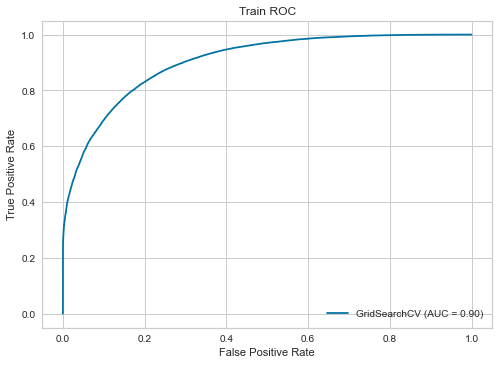

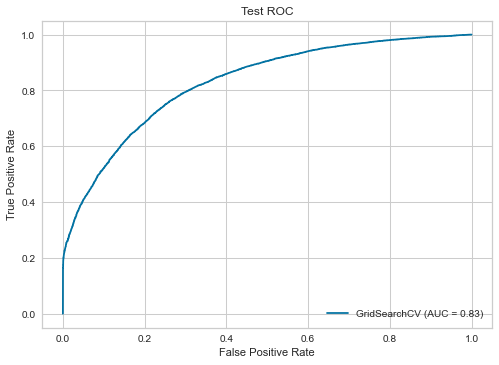

In [73]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(optimal_params_class, x_train, y_train)
plt.title("Train ROC")
plt.show()
plot_roc_curve(optimal_params_class, x_test, y_test)
plt.title("Test ROC")
plt.show()

Text(0.5, 1.0, 'Light Gradient Boosting Machine Classifier')

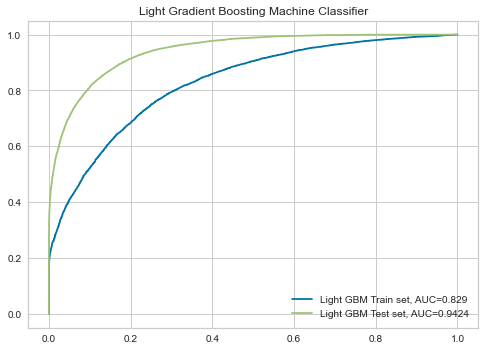

In [84]:
#set up plotting area
plt.figure(0).clf()

#fit model with train data and plot ROC curve
optimal_params_class.fit(x_train, y_train)
y_pred_train = optimal_params_class.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_train)
auc = round(metrics.roc_auc_score(y_test, y_pred_train), 4)
plt.plot(fpr,tpr,label="Light GBM Train set, AUC="+str(auc))

#fit model with test data and plot ROC curve
optimal_params_class.fit(x_test, y_test)
y_pred_test = optimal_params_class.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
plt.plot(fpr,tpr,label="Light GBM Test set, AUC="+str(auc))

#add legend
plt.legend()
plt.title("Light Gradient Boosting Machine Classifier")

# Using Tuned LGBM to predict if it would be sold within next 6 months or not for data_active

In [74]:
class_predictions = optimal_params_class.predict(data_active_dummy)
Label_class = pd.DataFrame(class_predictions, columns = ['Label_class'])

In [75]:
data_active_predict_class = data_active_dummy.copy()
data_active_predict_class['Predicted_SoldFlag'] = Label_class

In [76]:
data_active_predict_class['SKU_Number'] = merge_1['SKU_number']

data_active_predict_class['ItemCount_active'] = merge_1['ItemCount_active']

first_col = data_active_predict_class.pop('SKU_Number')
last_col = data_active_predict_class.pop('ItemCount_active')

data_active_predict_class.insert(0, 'SKU_Number', first_col)
data_active_predict_class.insert(len(data_active_predict_class.columns), 'ItemCount_active', last_col)

data_active_predict_class

,SKU_Number,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S,Predicted_SoldFlag,ItemCount_active
0,3951300,1.531114,-1.290050,0.869718,1.258545,1.0,6
1,809103,-0.533509,6.465635,0.580587,1.258545,1.0,13
2,876803,-0.017353,-0.863034,0.580587,1.258545,1.0,41
3,699392,-0.017353,0.066224,0.580587,1.258545,1.0,14
4,618374,2.305348,2.490684,0.676964,1.258545,1.0,100
...,...,...,...,...,...,...,...
65552,863599,-0.533509,-0.448578,0.195080,1.258545,1.0,34
65553,614304,0.498803,-1.011674,-0.190428,1.258545,1.0,53
65554,109021,0.756881,0.558237,0.002326,1.258545,1.0,21
65555,658242,-0.533509,-0.642664,0.580587,1.258545,1.0,23


In [77]:
data_active_predict_class

,SKU_Number,ReleaseNumber_hist,PriceReg_hist,ReleaseYear_hist,MarketingType_hist_S,Predicted_SoldFlag,ItemCount_active
0,3951300,1.531114,-1.290050,0.869718,1.258545,1.0,6
1,809103,-0.533509,6.465635,0.580587,1.258545,1.0,13
2,876803,-0.017353,-0.863034,0.580587,1.258545,1.0,41
3,699392,-0.017353,0.066224,0.580587,1.258545,1.0,14
4,618374,2.305348,2.490684,0.676964,1.258545,1.0,100
...,...,...,...,...,...,...,...
65552,863599,-0.533509,-0.448578,0.195080,1.258545,1.0,34
65553,614304,0.498803,-1.011674,-0.190428,1.258545,1.0,53
65554,109021,0.756881,0.558237,0.002326,1.258545,1.0,21
65555,658242,-0.533509,-0.642664,0.580587,1.258545,1.0,23


## Products' SKU_Number that needs restocking based on LGBM model

In [78]:
# Using inner merge to get back the original data for each SKU Number

data_active_predict_class = data_active_predict_class.merge(data_active_SKU, left_on = 'SKU_Number', right_on = 'SKU_number', how = 'inner')

data_active_predict_class

,SKU_Number,ReleaseNumber_hist_x,PriceReg_hist_x,ReleaseYear_hist_x,MarketingType_hist_S,Predicted_SoldFlag,ItemCount_active_x,SKU_number,MarketingType_hist,ReleaseNumber_hist_y,PriceReg_hist_y,ReleaseYear_hist_y,ItemCount_active_y
0,3951300,1.531114,-1.290050,0.869718,1.258545,1.0,6,3951300,S,10,0.00,2015,6
1,809103,-0.533509,6.465635,0.580587,1.258545,1.0,13,809103,S,2,599.00,2012,13
2,876803,-0.017353,-0.863034,0.580587,1.258545,1.0,41,876803,S,4,32.98,2012,41
3,699392,-0.017353,0.066224,0.580587,1.258545,1.0,14,699392,S,4,104.75,2012,14
4,618374,2.305348,2.490684,0.676964,1.258545,1.0,100,618374,S,13,292.00,2013,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65552,863599,-0.533509,-0.448578,0.195080,1.258545,1.0,34,863599,S,2,64.99,2008,34
65553,614304,0.498803,-1.011674,-0.190428,1.258545,1.0,53,614304,S,6,21.50,2004,53
65554,109021,0.756881,0.558237,0.002326,1.258545,1.0,21,109021,S,7,142.75,2006,21
65555,658242,-0.533509,-0.642664,0.580587,1.258545,1.0,23,658242,S,2,50.00,2012,23


In [79]:
# Dropping standardised columns

data_active_predict_class.drop(columns = ['ReleaseNumber_hist_x', 'PriceReg_hist_x', 'ReleaseYear_hist_x', 'MarketingType_hist_S', 'SKU_number', 'ItemCount_active_x'], inplace=True)

data_active_predict_class

,SKU_Number,Predicted_SoldFlag,MarketingType_hist,ReleaseNumber_hist_y,PriceReg_hist_y,ReleaseYear_hist_y,ItemCount_active_y
0,3951300,1.0,S,10,0.00,2015,6
1,809103,1.0,S,2,599.00,2012,13
2,876803,1.0,S,4,32.98,2012,41
3,699392,1.0,S,4,104.75,2012,14
4,618374,1.0,S,13,292.00,2013,100
...,...,...,...,...,...,...,...
65552,863599,1.0,S,2,64.99,2008,34
65553,614304,1.0,S,6,21.50,2004,53
65554,109021,1.0,S,7,142.75,2006,21
65555,658242,1.0,S,2,50.00,2012,23


In [80]:
# Renaming the headers to be more user-friendly

data_active_predict_class.rename(columns = {'MarketingType_hist': 'MarketingType', 
                                            'ReleaseNumber_hist_y': 'ReleaseNumber',
                                            'PriceReg_hist_y':'PriceReg',
                                            'ReleaseYear_hist_y':'ReleaseYear',
                                            'ItemCount_active_y': 'ItemCount_active'}, inplace = True )

data_active_predict_class

,SKU_Number,Predicted_SoldFlag,MarketingType,ReleaseNumber,PriceReg,ReleaseYear,ItemCount_active
0,3951300,1.0,S,10,0.00,2015,6
1,809103,1.0,S,2,599.00,2012,13
2,876803,1.0,S,4,32.98,2012,41
3,699392,1.0,S,4,104.75,2012,14
4,618374,1.0,S,13,292.00,2013,100
...,...,...,...,...,...,...,...
65552,863599,1.0,S,2,64.99,2008,34
65553,614304,1.0,S,6,21.50,2004,53
65554,109021,1.0,S,7,142.75,2006,21
65555,658242,1.0,S,2,50.00,2012,23


In [86]:
class_conditions = data_active_predict_class.loc[data_active_predict_class['Predicted_SoldFlag'] >= data_active_predict_class['ItemCount_active']]

class_conditions.sort_values(by = 'PriceReg', ascending=False).head(10)

,SKU_Number,Predicted_SoldFlag,MarketingType,ReleaseNumber,PriceReg,ReleaseYear,ItemCount_active
62037,3504396,1.0,S,8,317.00,2016,0
57196,3504561,1.0,S,5,274.99,2016,0
62022,3504528,1.0,S,7,274.99,2016,0
58159,3467973,1.0,S,2,250.00,2016,0
46327,2351093,1.0,S,5,160.00,2016,0
46051,3483275,1.0,S,2,149.95,2016,0
31645,1438250,1.0,S,8,116.75,2008,0
64494,858486,1.0,S,4,115.00,2015,0
48196,1440598,1.0,S,9,112.00,2011,0
62877,803858,1.0,S,2,89.95,2013,0


In [88]:
class_conditions

,SKU_Number,Predicted_SoldFlag,MarketingType,ReleaseNumber,PriceReg,ReleaseYear,ItemCount_active
939,2277016,1.0,S,5,0.00,2014,0
31645,1438250,1.0,S,8,116.75,2008,0
31649,2486467,1.0,D,7,69.00,2014,1
31656,3212060,1.0,S,0,48.97,1999,0
31877,764306,1.0,S,3,0.00,2005,0
32089,1621669,1.0,S,7,45.16,2006,0
33702,2693278,1.0,D,5,44.95,2014,0
42982,2485383,1.0,S,1,79.99,2014,0
44975,3801175,1.0,S,4,69.95,2017,0
46051,3483275,1.0,S,2,149.95,2016,0
